In [34]:
import tensorflow as tf
from treeple import ObliqueRandomForestClassifier
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import treeple

In [ ]:
!pip install proglearn
!pip install git+https://github.com/neurodata/treeple.git

#MNIST and Fashion MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

sporf = ObliqueRandomForestClassifier(n_estimators=100)
sporf.fit(x_train, y_train)
accuracy = sporf.score(x_test, y_test)
print(f"SPORF Accuracy on MNIST: {accuracy:.4f}")

SPORF Accuracy on MNIST: 0.9697


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

sporf = ObliqueRandomForestClassifier(n_estimators=100)
sporf.fit(x_train, y_train)

y_pred = sporf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SPORF Accuracy on Fashion-MNIST: {accuracy:.4f}")

SPORF Accuracy on Fashion-MNIST: 0.8751


In [ ]:
import time
import matplotlib.pyplot as plt
num_trials = 10
mnist_accuracies = []
mnist_times = []

for _ in range(num_trials):
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)

    sporf = ObliqueRandomForestClassifier(n_estimators=50)
    start_time = time.time()
    sporf.fit(x_train, y_train)
    y_pred = sporf.predict(x_test)
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    mnist_accuracies.append(accuracy)
    mnist_times.append(end_time - start_time)

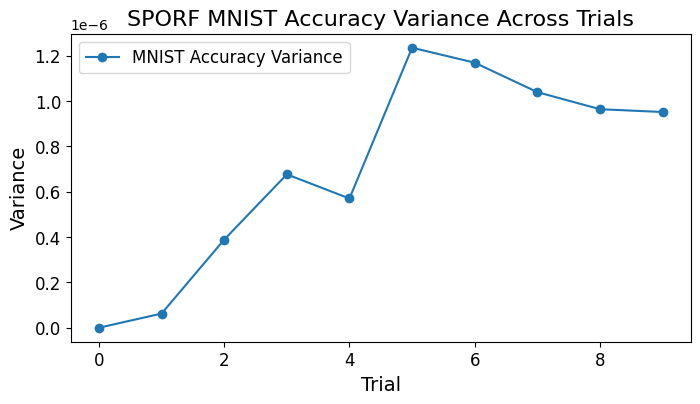

Average MNIST Training Time: 113.15 sec per trial
Time Variance Across Trials: 0.9482 sec²


In [ ]:
plt.figure(figsize=(8, 4))

mnist_variance = [np.var(mnist_accuracies[:i+1]) for i in range(len(mnist_accuracies))]

plt.plot(range(num_trials), mnist_variance, marker="o", label="MNIST Accuracy Variance")

plt.xlabel("Trial", fontsize=14)
plt.ylabel("Variance", fontsize=14)
plt.title("SPORF MNIST Accuracy Variance Across Trials", fontsize=16)
plt.legend(fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
print(f"Average MNIST Training Time: {np.mean(mnist_times):.2f} sec per trial")
print(f"Time Variance Across Trials: {np.var(mnist_times):.4f} sec²")

In [ ]:
num_trials = 10

fashion_accuracies = []
fashion_times = []

for _ in range(num_trials):
    (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

    x_train, x_test = x_train / 255.0, x_test / 255.0

    x_train = x_train.reshape(-1, 784)
    x_test = x_test.reshape(-1, 784)

    sporf = ObliqueRandomForestClassifier(n_estimators=100)
    start_time = time.time()
    sporf.fit(x_train, y_train)
    fashion_times.append(time.time() - start_time)

    y_pred = sporf.predict(x_test)
    fashion_accuracies.append(accuracy_score(y_test, y_pred))


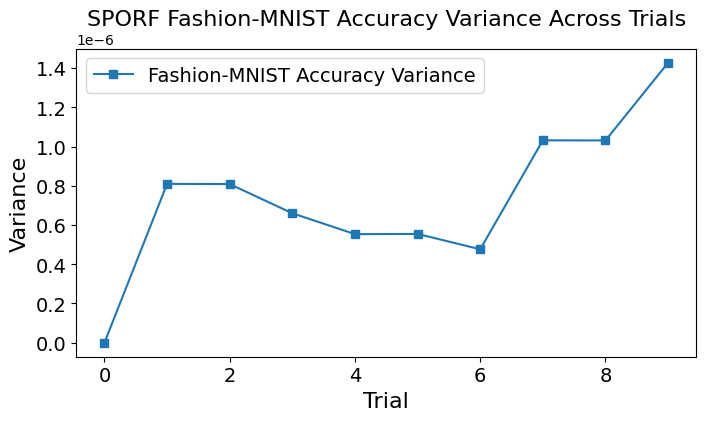

Final Fashion-MNIST Accuracy Variance: 0.0000


In [ ]:
fashion_variances = [np.var(fashion_accuracies[:i+1]) for i in range(len(fashion_accuracies))]

plt.figure(figsize=(8, 4))
plt.plot(range(num_trials), fashion_variances, marker="s", label="Fashion-MNIST Accuracy Variance")

plt.xlabel("Trial", fontsize=16)
plt.ylabel("Variance", fontsize=16)
plt.title("SPORF Fashion-MNIST Accuracy Variance Across Trials", fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

print(f"Final Fashion-MNIST Accuracy Variance: {fashion_variances[-1]:.4f}")

In [35]:
num_trials = 10
multitask_accuracies = []
multitask_times = []

for _ in range(num_trials):
    (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()
    (x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = keras.datasets.fashion_mnist.load_data()

    task_train_mnist = np.zeros(y_train_mnist.shape, dtype=int)
    task_test_mnist = np.zeros(y_test_mnist.shape, dtype=int)
    task_train_fashion = np.ones(y_train_fashion.shape, dtype=int)
    task_test_fashion = np.ones(y_test_fashion.shape, dtype=int)

    x_train_mnist, x_test_mnist = x_train_mnist / 255.0, x_test_mnist / 255.0
    x_train_fashion, x_test_fashion = x_train_fashion / 255.0, x_test_fashion / 255.0
    x_train_mnist = x_train_mnist.reshape(-1, 784)
    x_test_mnist = x_test_mnist.reshape(-1, 784)
    x_train_fashion = x_train_fashion.reshape(-1, 784)
    x_test_fashion = x_test_fashion.reshape(-1, 784)

    x_train = np.concatenate([x_train_mnist, x_train_fashion], axis=0)
    y_train = np.concatenate([y_train_mnist, y_train_fashion], axis=0)
    task_train = np.concatenate([task_train_mnist, task_train_fashion], axis=0)
    x_test = np.concatenate([x_test_mnist, x_test_fashion], axis=0)
    y_test = np.concatenate([y_test_mnist, y_test_fashion], axis=0)
    task_test = np.concatenate([task_test_mnist, task_test_fashion], axis=0)

    x_train_multi = np.column_stack((x_train, task_train))
    x_test_multi = np.column_stack((x_test, task_test))

    sporf = ObliqueRandomForestClassifier(n_estimators=50)
    start_time = time.time()
    sporf.fit(x_train_multi, y_train)
    elapsed_time = time.time() - start_time

    y_pred = sporf.predict(x_test_multi)
    accuracy = accuracy_score(y_test, y_pred)

    multitask_accuracies.append(accuracy)
    multitask_times.append(elapsed_time)

print("Finished running multi-task learning multiple times")

multitask_variances = [np.var(multitask_accuracies[:i+1]) for i in range(len(multitask_accuracies))]

plt.figure(figsize=(8, 4))
plt.plot(range(num_trials), multitask_variances, marker="^", label="Multi-Task Accuracy Variance")

plt.xlabel("Trial", fontsize=16)
plt.ylabel("Variance", fontsize=16)
plt.title("SPORF Multi-Task Accuracy Variance Across Trials", fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

print(f"Final Multi-Task Accuracy Variance: {multitask_variances[-1]:.4f}")
print(f"Average Multi-Task Training Time: {np.mean(multitask_times):.2f} sec per trial")
print(f"Time Variance Across Trials: {np.var(multitask_times):.4f} sec²")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


KeyboardInterrupt: 

In [ ]:
multitask_variances = [np.var(multitask_accuracies[:i+1]) for i in range(len(multitask_accuracies))]

plt.figure(figsize=(8, 4))
plt.plot(range(num_trials), multitask_variances, marker="^", label="Multi-Task Accuracy Variance")

plt.xlabel("Trial", fontsize=16)
plt.ylabel("Variance", fontsize=16)
plt.title("SPORF Multi-Task Accuracy Variance Across Trials", fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

print(f"Final Multi-Task Accuracy Variance: {multitask_variances[-1]:.4f}")


MNIST Accuracy: 0.9688 ± 0.0007
MNIST Training Time: 235.42 sec ± 3.05 sec
Fashion-MNIST Accuracy: 0.8740 ± 0.0013
Fashion-MNIST Training Time: 297.14 sec ± 1.64 sec
Multi-Task Accuracy: 0.9198 ± 0.0007
Multi-Task Training Time: 571.23 sec ± 7.81 sec


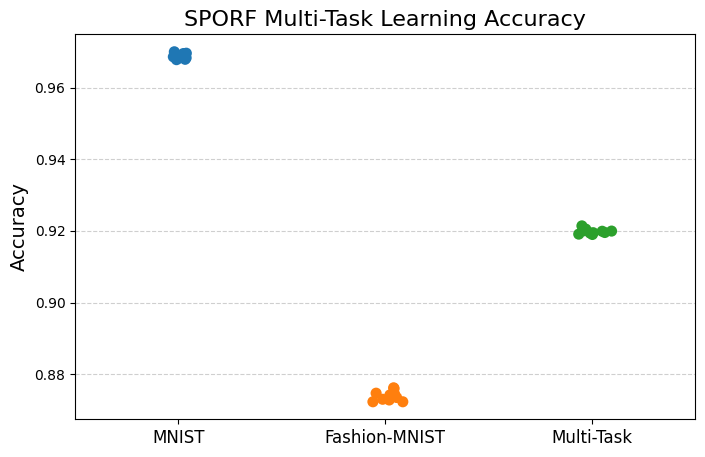

In [38]:
from tensorflow.keras.datasets import mnist, fashion_mnist
num_trials = 10

results = {
    "MNIST": {"accuracy": [], "time": []},
    "Fashion-MNIST": {"accuracy": [], "time": []},
    "Multi-Task": {"accuracy": [], "time": []}
}

for _ in range(num_trials):
    (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
    (x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

    x_train_mnist = x_train_mnist.reshape(-1, 28*28) / 255.0
    x_test_mnist = x_test_mnist.reshape(-1, 28*28) / 255.0
    x_train_fashion = x_train_fashion.reshape(-1, 28*28) / 255.0
    x_test_fashion = x_test_fashion.reshape(-1, 28*28) / 255.0

    start = time.time()
    sporf = ObliqueRandomForestClassifier(n_estimators=100)
    sporf.fit(x_train_mnist, y_train_mnist)
    y_pred = sporf.predict(x_test_mnist)
    results["MNIST"]["accuracy"].append(accuracy_score(y_test_mnist, y_pred))
    results["MNIST"]["time"].append(time.time() - start)

    start = time.time()
    sporf.fit(x_train_fashion, y_train_fashion)
    y_pred = sporf.predict(x_test_fashion)
    results["Fashion-MNIST"]["accuracy"].append(accuracy_score(y_test_fashion, y_pred))
    results["Fashion-MNIST"]["time"].append(time.time() - start)

    x_train = np.concatenate([x_train_mnist, x_train_fashion])
    y_train = np.concatenate([y_train_mnist, y_train_fashion])
    x_test = np.concatenate([x_test_mnist, x_test_fashion])
    y_test = np.concatenate([y_test_mnist, y_test_fashion])

    start = time.time()
    sporf.fit(x_train, y_train)
    y_pred = sporf.predict(x_test)
    results["Multi-Task"]["accuracy"].append(accuracy_score(y_test, y_pred))
    results["Multi-Task"]["time"].append(time.time() - start)

for key in results:
    results[key]["accuracy"] = np.array(results[key]["accuracy"])
    results[key]["time"] = np.array(results[key]["time"])

for key in results:
    print(f"{key} Accuracy: {results[key]['accuracy'].mean():.4f} ± {results[key]['accuracy'].std():.4f}")
    print(f"{key} Training Time: {results[key]['time'].mean():.2f} sec ± {results[key]['time'].std():.2f} sec")

plt.figure(figsize=(8, 5))
sns.stripplot(data=[results["MNIST"]["accuracy"], results["Fashion-MNIST"]["accuracy"], results["Multi-Task"]["accuracy"]],
              jitter=True, size=8)

plt.xticks([0, 1, 2], ["MNIST", "Fashion-MNIST", "Multi-Task"], fontsize=12)
plt.ylabel("Accuracy", fontsize=14)
plt.title("SPORF Multi-Task Learning Accuracy", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

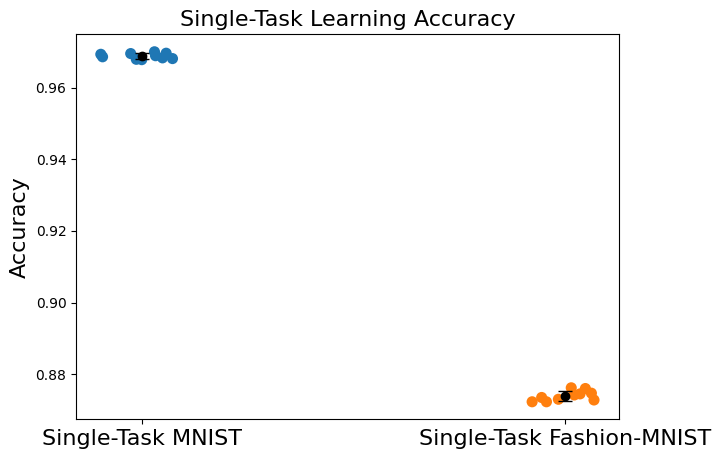

In [49]:
plt.figure(figsize=(7, 5))
sns.stripplot(data=[results["MNIST"]["accuracy"], results["Fashion-MNIST"]["accuracy"]],
              jitter=True, size=8)

plt.errorbar([0, 1],
             [results["MNIST"]["accuracy"].mean(), results["Fashion-MNIST"]["accuracy"].mean()],
             yerr=[results["MNIST"]["accuracy"].std(), results["Fashion-MNIST"]["accuracy"].std()],
             fmt="o", color="black", capsize=5, zorder=3)

plt.xticks([0, 1], ["Single-Task MNIST", "Single-Task Fashion-MNIST"], fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Single-Task Learning Accuracy", fontsize=16)
plt.show()

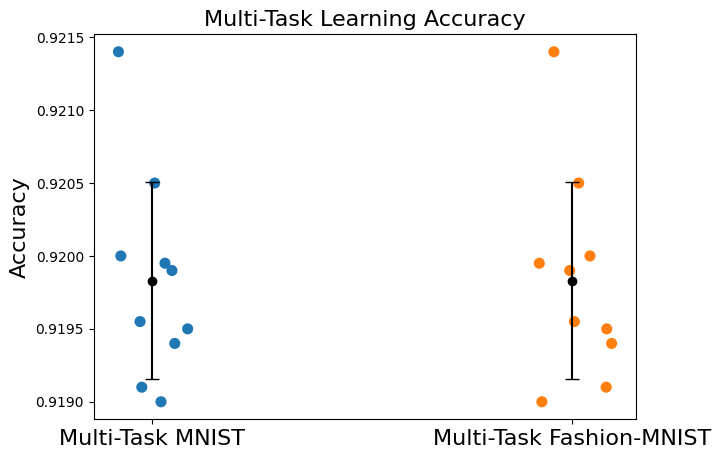

In [50]:
plt.figure(figsize=(7, 5))
sns.stripplot(data=[results["Multi-Task"]["accuracy"], results["Multi-Task"]["accuracy"]],
              jitter=True, size=8)

plt.errorbar([0, 1],
             [results["Multi-Task"]["accuracy"].mean(), results["Multi-Task"]["accuracy"].mean()],
             yerr=[results["Multi-Task"]["accuracy"].std(), results["Multi-Task"]["accuracy"].std()],
             fmt="o", color="black", capsize=5, zorder=3)

plt.xticks([0, 1], ["Multi-Task MNIST", "Multi-Task Fashion-MNIST"], fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Multi-Task Learning Accuracy", fontsize=16)
plt.show()


In [48]:
mnist_mean = np.mean(results["MNIST"]["accuracy"])
mnist_std = np.std(results["MNIST"]["accuracy"])
fashion_mnist_mean = np.mean(results["Fashion-MNIST"]["accuracy"])
fashion_mnist_std = np.std(results["Fashion-MNIST"]["accuracy"])
multi_task_mean = np.mean(results["Multi-Task"]["accuracy"])
multi_task_std = np.std(results["Multi-Task"]["accuracy"])

mnist_time_mean = np.mean(results["MNIST"]["time"])
mnist_time_std = np.std(results["MNIST"]["time"])
fashion_mnist_time_mean = np.mean(results["Fashion-MNIST"]["time"])
fashion_mnist_time_std = np.std(results["Fashion-MNIST"]["time"])
multi_task_time_mean = np.mean(results["Multi-Task"]["time"])
multi_task_time_std = np.std(results["Multi-Task"]["time"])

print(f"MNIST Accuracy: {mnist_mean:.4f} ± {mnist_std:.4f}")
print(f"MNIST Training Time: {mnist_time_mean:.2f} sec ± {mnist_time_std:.2f} sec")

print(f"Fashion-MNIST Accuracy: {fashion_mnist_mean:.4f} ± {fashion_mnist_std:.4f}")
print(f"Fashion-MNIST Training Time: {fashion_mnist_time_mean:.2f} sec ± {fashion_mnist_time_std:.2f} sec")

print(f"Multi-Task MNIST & Fashion-MNIST Accuracy: {multi_task_mean:.4f} ± {multi_task_std:.4f}")
print(f"Total Multi-Task Training Time: {multi_task_time_mean:.2f} sec ± {multi_task_time_std:.2f} sec")


MNIST Accuracy: 0.9688 ± 0.0007
MNIST Training Time: 235.42 sec ± 3.05 sec
Fashion-MNIST Accuracy: 0.8740 ± 0.0013
Fashion-MNIST Training Time: 297.14 sec ± 1.64 sec
Multi-Task MNIST & Fashion-MNIST Accuracy: 0.9198 ± 0.0007
Total Multi-Task Training Time: 571.23 sec ± 7.81 sec


#XOR and RXOR

['ExtendedIsolationForest', 'ExtraObliqueRandomForestClassifier', 'ExtraObliqueRandomForestRegressor', 'ExtraTreesClassifier', 'ExtraTreesRegressor', 'HonestForestClassifier', 'MultiViewRandomForestClassifier', 'NearestNeighborsMetaEstimator', 'ObliqueRandomForestClassifier', 'ObliqueRandomForestRegressor', 'PatchObliqueRandomForestClassifier', 'PatchObliqueRandomForestRegressor', 'RandomForestClassifier', 'RandomForestRegressor', 'UnsupervisedObliqueRandomForest', 'UnsupervisedRandomForest', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__treeple_SETUP__', '__version__', '_lib', 'ensemble', 'experimental', 'logger', 'logging', 'neighbors', 'os', 'stats', 'sys', 'tree']
